In [ ]:
import os
import shutil
import pandas as pd

df = pd.read_csv("meta_test.csv")
os.makedirs("./test/csv", exist_ok=True)

for src in df["coordinate_path"]:
    dst = os.path.join("./test/csv", os.path.basename(src))
    shutil.move(src, dst)


ExSeq_353
./test/image_scaled/ExSeq_353.tif
MERFISH_432
./test/image_scaled/MERFISH_432.tif
RCA_1148
./test/image_scaled/RCA_1148.tif
deepblink_594
./test/image_scaled/deepblink_594.tif
deepblink_239
./test/image_scaled/deepblink_239.tif
seqFISH_61
./test/image_scaled/seqFISH_61.tif
RCA_58
./test/image_scaled/RCA_58.tif
simfish_304
./test/image_scaled/simfish_304.tif
simfish_432
./test/image_scaled/simfish_432.tif
MERFISH_238
./test/image_scaled/MERFISH_238.tif
RCA_1155
./test/image_scaled/RCA_1155.tif
seqFISH_503
./test/image_scaled/seqFISH_503.tif
RCA_157
./test/image_scaled/RCA_157.tif
deepspot_36
./test/image_scaled/deepspot_36.tif
seqFISH_152
./test/image_scaled/seqFISH_152.tif
MERFISH_449
./test/image_scaled/MERFISH_449.tif
deepspot_95
./test/image_scaled/deepspot_95.tif
deepspot_380
./test/image_scaled/deepspot_380.tif
RCA_309
./test/image_scaled/RCA_309.tif
RCA_227
./test/image_scaled/RCA_227.tif
deepspot_306
./test/image_scaled/deepspot_306.tif
simfish_340
./test/image_scaled/

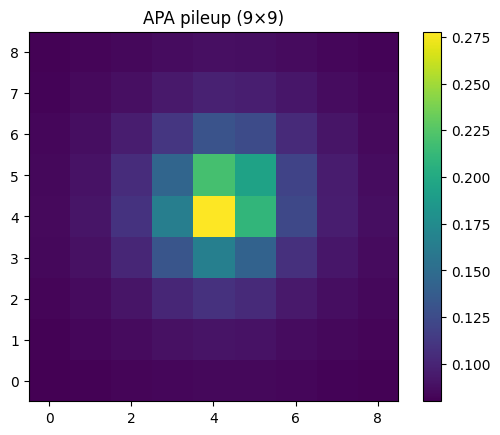

In [26]:
import os
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

spots_dir = './test/csv/'
img_dir = './test/image_scaled/'
W = 9
h = W // 2

pileup = np.zeros((W, W), dtype=float)
n = 0

for csv_path in glob.glob(os.path.join(spots_dir, '*.csv')):
    name = os.path.splitext(os.path.basename(csv_path))[0]
    print(name)
    df = pd.read_csv(csv_path)
    # img_candidates = glob.glob(os.path.join(img_dir, f'{name}.*'))
    img_path = os.path.join(img_dir, (name + '.tif'))
    print(img_path)
    img = imread(img_path)
    img_pad = np.pad(img, h, mode='constant')

    for y, x in zip(df['axis-0'], df['axis-1']):
        y, x = int(y), int(x)
        patch = img_pad[y:y+W, x:x+W]
        if patch.shape == (W, W):
            pileup += patch
            n += 1

pileup /= n

plt.imshow(pileup, origin='lower')
plt.colorbar()
plt.title('APA pileup (9×9)') 
plt.savefig('scaled_img_APA.pdf')
plt.show()

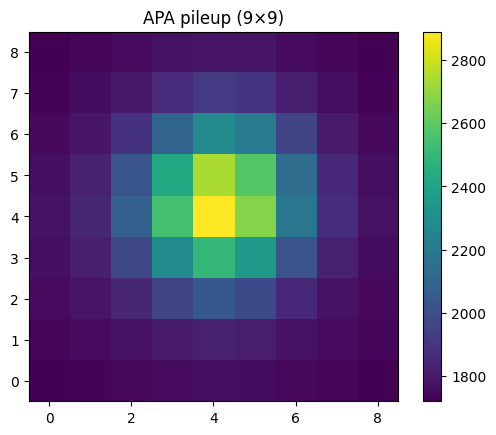

In [21]:
import os
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

spots_dir = './test/csv/'
img_dir = './test/image/'
W = 9
h = W // 2

pileup = np.zeros((W, W), dtype=float)
n = 0

for csv_path in glob.glob(os.path.join(spots_dir, '*.csv')):
    name = os.path.splitext(os.path.basename(csv_path))[0]
    df = pd.read_csv(csv_path)
    img_path = os.path.join(img_dir, (name + '.tif'))
    img = imread(img_path)
    img_pad = np.pad(img, h, mode='constant')

    for y, x in zip(df['axis-0'], df['axis-1']):
        y, x = int(y), int(x)
        patch = img_pad[y:y+W, x:x+W]
        if patch.shape == (W, W):
            pileup += patch
            n += 1

pileup /= n

plt.imshow(pileup, origin='lower')
plt.colorbar()
plt.title('APA pileup (9×9)') 
plt.savefig('raw_img_APA.pdf')
plt.show()


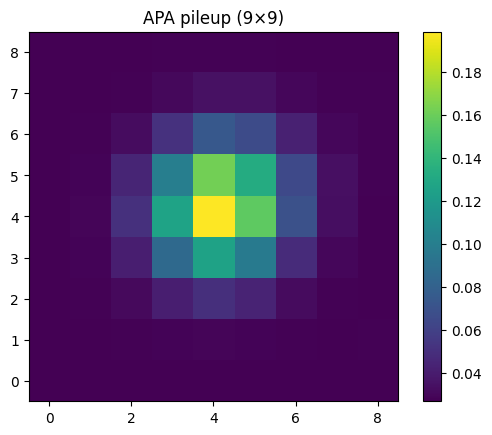

In [17]:
import os
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

spots_dir = './test/csv/'
img_dir = './test/pre_img/'
W = 9
h = W // 2

pileup = np.zeros((W, W), dtype=float)
n = 0

for csv_path in glob.glob(os.path.join(spots_dir, '*.csv')):
    name = os.path.splitext(os.path.basename(csv_path))[0]
    df = pd.read_csv(csv_path)
    img_path = os.path.join(img_dir, (name + '.tif'))
    img = imread(img_path)
    img_pad = np.pad(img, h, mode='constant')

    for y, x in zip(df['axis-0'], df['axis-1']):
        y, x = int(y), int(x)
        patch = img_pad[y:y+W, x:x+W]
        if patch.shape == (W, W):
            pileup += patch
            n += 1

pileup /= n

plt.imshow(pileup, origin='lower')
plt.colorbar()
plt.title('APA pileup (9×9)')
plt.savefig('csbdeep_img_APA.pdf')
plt.show()


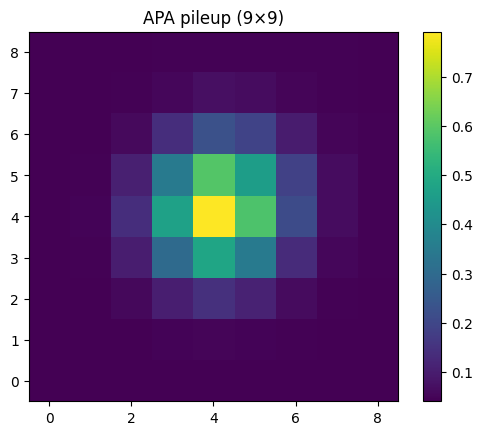

In [16]:
import os
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

spots_dir = './test/csv/'
img_dir = './test/ufish_enhance/'
W = 9
h = W // 2

pileup = np.zeros((W, W), dtype=float)
n = 0

for csv_path in glob.glob(os.path.join(spots_dir, '*.csv')):
    name = os.path.splitext(os.path.basename(csv_path))[0]
    df = pd.read_csv(csv_path)
    img_path = os.path.join(img_dir, (name + '.enhanced.tif'))
    img = imread(img_path)
    img_pad = np.pad(img, h, mode='constant')

    for y, x in zip(df['axis-0'], df['axis-1']):
        y, x = int(y), int(x)
        patch = img_pad[y:y+W, x:x+W]
        if patch.shape == (W, W):
            pileup += patch
            n += 1

pileup /= n

plt.imshow(pileup, origin='lower')
plt.colorbar()
plt.title('APA pileup (9×9)') 
plt.savefig('ufish_img_APA.pdf')
plt.show()


In [12]:
import os
import numpy as np
from skimage.io import imread, imsave
from skimage import restoration, img_as_float

raw_dir = './test/image_scaled//'
decon_dir = './test/Deconvoled'
os.makedirs(decon_dir, exist_ok=True)

psf = np.ones((3, 3)) / 25

for fname in os.listdir(raw_dir):
    img = imread(os.path.join(raw_dir, fname))
    img_float = img_as_float(img)
    deconvolved = restoration.richardson_lucy(img_float, psf, 30)
    # out = (np.clip(deconvolved, 0, 1) * 255).astype(np.float16)
    imsave(os.path.join(decon_dir, fname), deconvolved)
    print(f'{fname} 反卷积完成')

seqFISH_207.tif 反卷积完成
RCA_72.tif 反卷积完成
MERFISH_302.tif 反卷积完成
deepblink_478.tif 反卷积完成
seqFISH_397.tif 反卷积完成
ExSeq_72.tif 反卷积完成
deepspot_230.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_976.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_976.tif 反卷积完成
RCA_68.tif 反卷积完成
deepspot_21.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_717.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_717.tif 反卷积完成
deepspot_36.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_58.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_58.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_298.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_298.tif 反卷积完成
MERFISH_449.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_441.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_441.tif 反卷积完成
seqFISH_107.tif 反卷积完成
seqFISH_78.tif 反卷积完成
deepblink_487.tif 反卷积完成
deepblink_209.tif 反卷积完成
RCA_1032.tif 反卷积完成
simfish_203.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_469.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_469.tif 反卷积完成
seqFISH_20.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_388.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_388.tif 反卷积完成
simfish_381.tif 反卷积完成
seqFISH_350.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_833.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_833.tif 反卷积完成
deepspot_393.tif 反卷积完成
deepblink_67.tif 反卷积完成
deepblink_24.tif 反卷积完成
simfish_281.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_189.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_189.tif 反卷积完成
RCA_538.tif 反卷积完成
MERFISH_17.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_186.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_186.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_537.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_537.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_210.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_210.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_116.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_116.tif 反卷积完成
deepblink_609.tif 反卷积完成
deepblink_365.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_670.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_670.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1138.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1138.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_173.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_173.tif 反卷积完成
MERFISH_155.tif 反卷积完成
deepblink_394.tif 反卷积完成
seqFISH_130.tif 反卷积完成
seqFISH_176.tif 反卷积完成
deepspot_276.tif 反卷积完成
deepblink_329.tif 反卷积完成
MERFISH_249.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_452.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_452.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_481.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_481.tif 反卷积完成
MERFISH_480.tif 反卷积完成
MERFISH_244.tif 反卷积完成
deepspot_9.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_187.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_187.tif 反卷积完成
simfish_479.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1173.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1173.tif 反卷积完成
deepblink_223.tif 反卷积完成
MERFISH_146.tif 反卷积完成
deepspot_468.tif 反卷积完成
MERFISH_463.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_260.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_260.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_86.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_86.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_386.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_386.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_434.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_434.tif 反卷积完成
deepblink_402.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_619.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_619.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_888.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_888.tif 反卷积完成
simfish_67.tif 反卷积完成
deepspot_189.tif 反卷积完成
RCA_237.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_154.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_154.tif 反卷积完成
RCA_463.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_377.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_377.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_17.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_17.tif 反卷积完成
seqFISH_405.tif 反卷积完成
MERFISH_537.tif 反卷积完成
deepblink_21.tif 反卷积完成
seqFISH_508.tif 反卷积完成
simfish_430.tif 反卷积完成
MERFISH_75.tif 反卷积完成
deepspot_61.tif 反卷积完成
deepblink_207.tif 反卷积完成
deepblink_205.tif 反卷积完成
seqFISH_398.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_267.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_267.tif 反卷积完成
MERFISH_450.tif 反卷积完成
seqFISH_380.tif 反卷积完成
MERFISH_447.tif 反卷积完成
deepspot_58.tif 反卷积完成
seqFISH_503.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_988.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_988.tif 反卷积完成
MERFISH_5.tif 反卷积完成
MERFISH_575.tif 反卷积完成
seqFISH_152.tif 反卷积完成
MERFISH_329.tif 反卷积完成
deepblink_442.tif 反卷积完成
seqFISH_55.tif 反卷积完成
simfish_364.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_88.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_88.tif 反卷积完成
seqFISH_303.tif 反卷积完成
deepblink_481.tif 反卷积完成
simfish_340.tif 反卷积完成
deepspot_3.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_405.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_405.tif 反卷积完成
seqFISH_85.tif 反卷积完成
deepblink_245.tif 反卷积完成
MERFISH_47.tif 反卷积完成
MERFISH_227.tif 反卷积完成
deepblink_331.tif 反卷积完成
deepblink_495.tif 反卷积完成
RCA_1029.tif 反卷积完成
RCA_544.tif 反卷积完成
deepspot_170.tif 反卷积完成
deepblink_189.tif 反卷积完成
deepspot_494.tif 反卷积完成
seqFISH_520.tif 反卷积完成
simfish_135.tif 反卷积完成
MERFISH_215.tif 反卷积完成
ExSeq_63.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_629.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_629.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_746.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_746.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_353.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_353.tif 反卷积完成
simfish_19.tif 反卷积完成
simfish_147.tif 反卷积完成
simfish_16.tif 反卷积完成
simfish_416.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_410.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_410.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_872.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_872.tif 反卷积完成
MERFISH_283.tif 反卷积完成
ExSeq_19.tif 反卷积完成
RCA_566.tif 反卷积完成
simfish_169.tif 反卷积完成
MERFISH_198.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_364.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_364.tif 反卷积完成
deepblink_622.tif 反卷积完成
seqFISH_444.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1010.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1010.tif 反卷积完成
seqFISH_386.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_125.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_125.tif 反卷积完成
deepblink_239.tif 反卷积完成
deepblink_366.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_151.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_151.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_315.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_315.tif 反卷积完成
deepspot_291.tif 反卷积完成
deepspot_430.tif 反卷积完成
MERFISH_317.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_871.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_871.tif 反卷积完成
deepblink_20.tif 反卷积完成
seqFISH_430.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_523.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_523.tif 反卷积完成
MERFISH_335.tif 反卷积完成
MERFISH_240.tif 反卷积完成
seqFISH_311.tif 反卷积完成
deepblink_198.tif 反卷积完成
deepspot_364.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_839.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_839.tif 反卷积完成
deepblink_513.tif 反卷积完成
deepspot_305.tif 反卷积完成
MERFISH_517.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_641.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_641.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_182.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_182.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_278.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_278.tif 反卷积完成
RCA_725.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_367.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_367.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/simfish_161.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


simfish_161.tif 反卷积完成
simfish_378.tif 反卷积完成
MERFISH_487.tif 反卷积完成
deepblink_173.tif 反卷积完成
deepblink_544.tif 反卷积完成
deepspot_46.tif 反卷积完成
MERFISH_279.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_225.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_225.tif 反卷积完成
MERFISH_276.tif 反卷积完成
seqFISH_50.tif 反卷积完成
deepspot_38.tif 反卷积完成
RCA_344.tif 反卷积完成
deepspot_252.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_471.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_471.tif 反卷积完成
MERFISH_546.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1176.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1176.tif 反卷积完成
deepspot_336.tif 反卷积完成
ExSeq_53.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1247.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1247.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1155.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1155.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_130.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_130.tif 反卷积完成
simfish_371.tif 反卷积完成
simfish_471.tif 反卷积完成
deepblink_568.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_845.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_845.tif 反卷积完成
MERFISH_206.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_221.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_221.tif 反卷积完成
simfish_11.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/deepblink_262.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


deepblink_262.tif 反卷积完成
deepblink_167.tif 反卷积完成
deepblink_464.tif 反卷积完成
deepspot_331.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_877.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_877.tif 反卷积完成
MERFISH_477.tif 反卷积完成
simfish_492.tif 反卷积完成
MERFISH_96.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1197.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1197.tif 反卷积完成
deepblink_585.tif 反卷积完成
seqFISH_240.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_352.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_352.tif 反卷积完成
RCA_361.tif 反卷积完成
deepblink_641.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_794.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_794.tif 反卷积完成
MERFISH_376.tif 反卷积完成
simfish_432.tif 反卷积完成
seqFISH_286.tif 反卷积完成
simfish_193.tif 反卷积完成
RCA_559.tif 反卷积完成
simfish_419.tif 反卷积完成
deepblink_532.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_10.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_10.tif 反卷积完成
deepblink_557.tif 反卷积完成
ExSeq_333.tif 反卷积完成
deepspot_403.tif 反卷积完成
deepspot_479.tif 反卷积完成
deepblink_597.tif 反卷积完成
seqFISH_330.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1073.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1073.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_153.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_153.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/MERFISH_291.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


MERFISH_291.tif 反卷积完成
deepblink_446.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_659.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_659.tif 反卷积完成
seqFISH_99.tif 反卷积完成
simfish_270.tif 反卷积完成
seqFISH_238.tif 反卷积完成
deepblink_136.tif 反卷积完成
simfish_128.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_395.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_395.tif 反卷积完成
simfish_283.tif 反卷积完成
deepspot_360.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/deepblink_621.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


deepblink_621.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_253.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_253.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_655.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_655.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_569.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_569.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1062.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1062.tif 反卷积完成
RCA_5.tif 反卷积完成
simfish_143.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/seqFISH_61.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


seqFISH_61.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_309.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_309.tif 反卷积完成
simfish_52.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_85.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_85.tif 反卷积完成
seqFISH_218.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1233.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1233.tif 反卷积完成
RCA_205.tif 反卷积完成
MERFISH_440.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_197.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_197.tif 反卷积完成
deepblink_87.tif 反卷积完成
deepspot_306.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_233.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_233.tif 反卷积完成
RCA_15.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1104.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1104.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/simfish_185.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


simfish_185.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_941.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_941.tif 反卷积完成
simfish_35.tif 反卷积完成
seqFISH_294.tif 反卷积完成
ExSeq_46.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_32.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_32.tif 反卷积完成
deepblink_574.tif 反卷积完成
simfish_205.tif 反卷积完成
deepblink_42.tif 反卷积完成
deepspot_380.tif 反卷积完成
simfish_495.tif 反卷积完成
deepspot_181.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_952.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_952.tif 反卷积完成
deepspot_248.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_25.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_25.tif 反卷积完成
MERFISH_474.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_5.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_5.tif 反卷积完成
MERFISH_372.tif 反卷积完成
MERFISH_413.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1166.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1166.tif 反卷积完成
deepblink_594.tif 反卷积完成
simfish_442.tif 反卷积完成
deepblink_292.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_402.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_402.tif 反卷积完成
simfish_236.tif 反卷积完成
MERFISH_209.tif 反卷积完成
deepspot_390.tif 反卷积完成
simfish_317.tif 反卷积完成
deepspot_367.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1046.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1046.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_577.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_577.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_406.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_406.tif 反卷积完成
deepblink_406.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_467.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_467.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_930.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_930.tif 反卷积完成
RCA_521.tif 反卷积完成
deepspot_481.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_855.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_855.tif 反卷积完成
MERFISH_489.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_483.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_483.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_157.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_157.tif 反卷积完成
RCA_309.tif 反卷积完成
deepblink_526.tif 反卷积完成
RCA_585.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1106.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1106.tif 反卷积完成
deepblink_103.tif 反卷积完成
deepblink_326.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_376.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_376.tif 反卷积完成
MERFISH_432.tif 反卷积完成
seqFISH_36.tif 反卷积完成
deepblink_338.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1090.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1090.tif 反卷积完成
deepblink_603.tif 反卷积完成
ExSeq_55.tif 反卷积完成
RCA_1212.tif 反卷积完成
seqFISH_362.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_840.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_840.tif 反卷积完成
deepblink_413.tif 反卷积完成
deepblink_485.tif 反卷积完成
RCA_83.tif 反卷积完成
deepblink_615.tif 反卷积完成
ExSeq_325.tif 反卷积完成
seqFISH_462.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_286.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_286.tif 反卷积完成
RCA_530.tif 反卷积完成
seqFISH_89.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_764.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_764.tif 反卷积完成
deepspot_54.tif 反卷积完成
seqFISH_212.tif 反卷积完成
RCA_586.tif 反卷积完成
deepblink_191.tif 反卷积完成
MERFISH_208.tif 反卷积完成
simfish_211.tif 反卷积完成
deepblink_424.tif 反卷积完成
RCA_468.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_607.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_607.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1103.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1103.tif 反卷积完成
simfish_304.tif 反卷积完成
simfish_329.tif 反卷积完成
deepblink_236.tif 反卷积完成
deepblink_479.tif 反卷积完成
RCA_213.tif 反卷积完成
RCA_204.tif 反卷积完成
MERFISH_197.tif 反卷积完成
MERFISH_153.tif 反卷积完成
RCA_270.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_496.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_496.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_861.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_861.tif 反卷积完成
deepblink_168.tif 反卷积完成
deepspot_95.tif 反卷积完成
deepblink_101.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_323.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_323.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/MERFISH_274.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


MERFISH_274.tif 反卷积完成
simfish_246.tif 反卷积完成
ExSeq_205.tif 反卷积完成
seqFISH_282.tif 反卷积完成
RCA_218.tif 反卷积完成
MERFISH_441.tif 反卷积完成
RCA_86.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1234.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1234.tif 反卷积完成
deepspot_25.tif 反卷积完成
MERFISH_354.tif 反卷积完成
simfish_216.tif 反卷积完成
RCA_1224.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/seqFISH_328.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


seqFISH_328.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1149.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1149.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_821.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_821.tif 反卷积完成
seqFISH_192.tif 反卷积完成
deepspot_386.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_31.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_31.tif 反卷积完成
simfish_235.tif 反卷积完成
deepblink_43.tif 反卷积完成
MERFISH_106.tif 反卷积完成
simfish_355.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_321.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_321.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_95.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_95.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_366.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_366.tif 反卷积完成
deepspot_402.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_745.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_745.tif 反卷积完成
deepblink_34.tif 反卷积完成
deepblink_346.tif 反卷积完成
seqFISH_281.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_176.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_176.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1135.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1135.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_401.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_401.tif 反卷积完成
deepblink_102.tif 反卷积完成
MERFISH_483.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_543.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_543.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_926.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_926.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1206.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1206.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_103.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_103.tif 反卷积完成
MERFISH_44.tif 反卷积完成
deepblink_533.tif 反卷积完成
deepspot_132.tif 反卷积完成
MERFISH_398.tif 反卷积完成
deepblink_627.tif 反卷积完成
simfish_118.tif 反卷积完成
seqFISH_211.tif 反卷积完成
deepblink_486.tif 反卷积完成
seqFISH_141.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1069.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1069.tif 反卷积完成
MERFISH_415.tif 反卷积完成
ExSeq_81.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_713.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_713.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_370.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_370.tif 反卷积完成
deepblink_403.tif 反卷积完成
simfish_90.tif 反卷积完成
MERFISH_263.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_228.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_228.tif 反卷积完成
seqFISH_216.tif 反卷积完成
seqFISH_88.tif 反卷积完成
deepspot_280.tif 反卷积完成
MERFISH_190.tif 反卷积完成
RCA_470.tif 反卷积完成
simfish_226.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_25.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_25.tif 反卷积完成
deepspot_319.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_104.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_104.tif 反卷积完成
RCA_203.tif 反卷积完成
simfish_56.tif 反卷积完成
seqFISH_92.tif 反卷积完成
simfish_204.tif 反卷积完成
simfish_325.tif 反卷积完成
seqFISH_254.tif 反卷积完成
deepspot_259.tif 反卷积完成
MERFISH_571.tif 反卷积完成
deepspot_359.tif 反卷积完成
seqFISH_252.tif 反卷积完成
simfish_149.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_408.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_408.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_990.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_990.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/simfish_198.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


simfish_198.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_777.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_777.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1013.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1013.tif 反卷积完成
deepspot_350.tif 反卷积完成
MERFISH_162.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_331.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_331.tif 反卷积完成
seqFISH_494.tif 反卷积完成
seqFISH_310.tif 反卷积完成
seqFISH_156.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_943.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_943.tif 反卷积完成
seqFISH_9.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_906.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_906.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_813.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_813.tif 反卷积完成
RCA_665.tif 反卷积完成
deepblink_62.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_341.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_341.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_835.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_835.tif 反卷积完成
MERFISH_89.tif 反卷积完成
seqFISH_249.tif 反卷积完成
MERFISH_469.tif 反卷积完成
deepblink_418.tif 反卷积完成
deepblink_180.tif 反卷积完成
deepblink_184.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_372.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_372.tif 反卷积完成
deepspot_173.tif 反卷积完成
simfish_366.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_99.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_99.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1007.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1007.tif 反卷积完成
deepspot_493.tif 反卷积完成
deepblink_367.tif 反卷积完成
deepspot_83.tif 反卷积完成
deepblink_619.tif 反卷积完成
simfish_59.tif 反卷积完成
MERFISH_325.tif 反卷积完成
simfish_123.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1018.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1018.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1097.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1097.tif 反卷积完成
RCA_518.tif 反卷积完成
simfish_332.tif 反卷积完成
deepspot_71.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_677.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_677.tif 反卷积完成
RCA_453.tif 反卷积完成
RCA_176.tif 反卷积完成
simfish_289.tif 反卷积完成
seqFISH_416.tif 反卷积完成
RCA_16.tif 反卷积完成
simfish_27.tif 反卷积完成
deepblink_145.tif 反卷积完成
deepblink_4.tif 反卷积完成
deepspot_433.tif 反卷积完成
MERFISH_280.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_520.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_520.tif 反卷积完成
seqFISH_431.tif 反卷积完成
deepblink_405.tif 反卷积完成
MERFISH_79.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_405.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_405.tif 反卷积完成
seqFISH_30.tif 反卷积完成
deepblink_404.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_255.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_255.tif 反卷积完成
MERFISH_40.tif 反卷积完成
seqFISH_167.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/simfish_153.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


simfish_153.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_593.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_593.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/ExSeq_474.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


ExSeq_474.tif 反卷积完成
MERFISH_539.tif 反卷积完成
MERFISH_156.tif 反卷积完成
RCA_347.tif 反卷积完成
MERFISH_94.tif 反卷积完成
simfish_284.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_474.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_474.tif 反卷积完成
simfish_251.tif 反卷积完成
simfish_250.tif 反卷积完成
deepspot_347.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_865.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_865.tif 反卷积完成
MERFISH_386.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1148.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1148.tif 反卷积完成
simfish_449.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_999.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_999.tif 反卷积完成
deepspot_74.tif 反卷积完成
MERFISH_250.tif 反卷积完成
deepspot_105.tif 反卷积完成
deepblink_13.tif 反卷积完成
deepblink_327.tif 反卷积完成
seqFISH_360.tif 反卷积完成
simfish_385.tif 反卷积完成
MERFISH_466.tif 反卷积完成
RCA_227.tif 反卷积完成
MERFISH_572.tif 反卷积完成
deepblink_81.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_907.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_907.tif 反卷积完成
MERFISH_238.tif 反卷积完成
RCA_295.tif 反卷积完成
MERFISH_534.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_556.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_556.tif 反卷积完成
deepspot_470.tif 反卷积完成
MERFISH_406.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_950.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_950.tif 反卷积完成
deepspot_333.tif 反卷积完成
simfish_7.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_992.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_992.tif 反卷积完成
simfish_392.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_44.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_44.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_191.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_191.tif 反卷积完成
deepblink_626.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_982.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_982.tif 反卷积完成
seqFISH_341.tif 反卷积完成
ExSeq_47.tif 反卷积完成
deepblink_65.tif 反卷积完成
deepblink_35.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1099.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1099.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_1047.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_1047.tif 反卷积完成
deepspot_441.tif 反卷积完成
deepblink_257.tif 反卷积完成
MERFISH_460.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/MERFISH_117.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


MERFISH_117.tif 反卷积完成
MERFISH_410.tif 反卷积完成
deepblink_260.tif 反卷积完成
simfish_74.tif 反卷积完成
deepblink_272.tif 反卷积完成


/tmp/ipykernel_1123159/523249917.py:17: UserWarning: ./test/Deconvoled/RCA_511.tif is a low contrast image
  imsave(os.path.join(decon_dir, fname), deconvolved)


RCA_511.tif 反卷积完成
deepblink_575.tif 反卷积完成


In [80]:
import os, glob, numpy as np
from skimage.io import imread, imsave
from skimage.restoration import richardson_lucy
from skimage.filters import gaussian
from skimage import img_as_float

root = './test/image_scaled'
out  = './test/Deconvoled'
os.makedirs(out, exist_ok=True)

# 构造近似 PSF
psf_size, sigma_px = 31, 2.0
psf = np.zeros((psf_size, psf_size))
psf[psf_size//2, psf_size//2] = 1
psf = gaussian(psf, sigma_px)
psf /= psf.sum()

for f in glob.glob(os.path.join(root, '*.tif')):
    img = img_as_float(imread(f))
    if img.ndim == 2:
        decon = richardson_lucy(img, psf, num_iter=25, clip=True)
    else:
        decon = np.stack([richardson_lucy(img[..., ch], psf, 25, clip=True)
                          for ch in range(img.shape[2])], axis=-1)
    out_path = os.path.join(out, os.path.basename(f))
    imsave(out_path, (np.clip(decon, 0, 1)*65535).astype(np.uint16))
    print(f'{f}   →   反卷积完成')


./test/image_scaled/seqFISH_207.tif   →   反卷积完成
./test/image_scaled/RCA_72.tif   →   反卷积完成
./test/image_scaled/MERFISH_302.tif   →   反卷积完成
./test/image_scaled/deepblink_478.tif   →   反卷积完成
./test/image_scaled/seqFISH_397.tif   →   反卷积完成
./test/image_scaled/ExSeq_72.tif   →   反卷积完成
./test/image_scaled/deepspot_230.tif   →   反卷积完成
./test/image_scaled/RCA_976.tif   →   反卷积完成
./test/image_scaled/RCA_68.tif   →   反卷积完成
./test/image_scaled/deepspot_21.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_717.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_717.tif   →   反卷积完成
./test/image_scaled/deepspot_36.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_58.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_58.tif   →   反卷积完成
./test/image_scaled/ExSeq_298.tif   →   反卷积完成
./test/image_scaled/MERFISH_449.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_441.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_441.tif   →   反卷积完成
./test/image_scaled/seqFISH_107.tif   →   反卷积完成
./test/image_scaled/seqFISH_78.tif   →   反卷积完成
./test/image_scaled/deepblink_487.tif   →   反卷积完成
./test/image_scaled/deepblink_209.tif   →   反卷积完成
./test/image_scaled/RCA_1032.tif   →   反卷积完成
./test/image_scaled/simfish_203.tif   →   反卷积完成
./test/image_scaled/RCA_469.tif   →   反卷积完成
./test/image_scaled/seqFISH_20.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_388.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_388.tif   →   反卷积完成
./test/image_scaled/simfish_381.tif   →   反卷积完成
./test/image_scaled/seqFISH_350.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_833.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_833.tif   →   反卷积完成
./test/image_scaled/deepspot_393.tif   →   反卷积完成
./test/image_scaled/deepblink_67.tif   →   反卷积完成
./test/image_scaled/deepblink_24.tif   →   反卷积完成
./test/image_scaled/simfish_281.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_189.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_189.tif   →   反卷积完成
./test/image_scaled/RCA_538.tif   →   反卷积完成
./test/image_scaled/MERFISH_17.tif   →   反卷积完成
./test/image_scaled/RCA_186.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_537.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_537.tif   →   反卷积完成
./test/image_scaled/RCA_210.tif   →   反卷积完成
./test/image_scaled/RCA_116.tif   →   反卷积完成
./test/image_scaled/deepblink_609.tif   →   反卷积完成
./test/image_scaled/deepblink_365.tif   →   反卷积完成
./test/image_scaled/RCA_670.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1138.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1138.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_173.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_173.tif   →   反卷积完成
./test/image_scaled/MERFISH_155.tif   →   反卷积完成
./test/image_scaled/deepblink_394.tif   →   反卷积完成
./test/image_scaled/seqFISH_130.tif   →   反卷积完成
./test/image_scaled/seqFISH_176.tif   →   反卷积完成
./test/image_scaled/deepspot_276.tif   →   反卷积完成
./test/image_scaled/deepblink_329.tif   →   反卷积完成
./test/image_scaled/MERFISH_249.tif   →   反卷积完成
./test/image_scaled/ExSeq_452.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_481.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_481.tif   →   反卷积完成
./test/image_scaled/MERFISH_480.tif   →   反卷积完成
./test/image_scaled/MERFISH_244.tif   →   反卷积完成
./test/image_scaled/deepspot_9.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_187.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_187.tif   →   反卷积完成
./test/image_scaled/simfish_479.tif   →   反卷积完成
./test/image_scaled/RCA_1173.tif   →   反卷积完成
./test/image_scaled/deepblink_223.tif   →   反卷积完成
./test/image_scaled/MERFISH_146.tif   →   反卷积完成
./test/image_scaled/deepspot_468.tif   →   反卷积完成
./test/image_scaled/MERFISH_463.tif   →   反卷积完成
./test/image_scaled/ExSeq_260.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_86.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_86.tif   →   反卷积完成
./test/image_scaled/ExSeq_386.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_434.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_434.tif   →   反卷积完成
./test/image_scaled/deepblink_402.tif   →   反卷积完成
./test/image_scaled/RCA_619.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_888.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_888.tif   →   反卷积完成
./test/image_scaled/simfish_67.tif   →   反卷积完成
./test/image_scaled/deepspot_189.tif   →   反卷积完成
./test/image_scaled/RCA_237.tif   →   反卷积完成
./test/image_scaled/RCA_154.tif   →   反卷积完成
./test/image_scaled/RCA_463.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_377.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_377.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_17.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_17.tif   →   反卷积完成
./test/image_scaled/seqFISH_405.tif   →   反卷积完成
./test/image_scaled/MERFISH_537.tif   →   反卷积完成
./test/image_scaled/deepblink_21.tif   →   反卷积完成
./test/image_scaled/seqFISH_508.tif   →   反卷积完成
./test/image_scaled/simfish_430.tif   →   反卷积完成
./test/image_scaled/MERFISH_75.tif   →   反卷积完成
./test/image_scaled/deepspot_61.tif   →   反卷积完成
./test/image_scaled/deepblink_207.tif   →   反卷积完成
./test/image_scaled/deepblink_205.tif   →   反卷积完成
./test/image_scaled/seqFISH_398.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_267.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_267.tif   →   反卷积完成
./test/image_scaled/MERFISH_450.tif   →   反卷积完成
./test/image_scaled/seqFISH_380.tif   →   反卷积完成
./test/image_scaled/MERFISH_447.tif   →   反卷积完成
./test/image_scaled/deepspot_58.tif   →   反卷积完成
./test/image_scaled/seqFISH_503.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_988.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_988.tif   →   反卷积完成
./test/image_scaled/MERFISH_5.tif   →   反卷积完成
./test/image_scaled/MERFISH_575.tif   →   反卷积完成
./test/image_scaled/seqFISH_152.tif   →   反卷积完成
./test/image_scaled/MERFISH_329.tif   →   反卷积完成
./test/image_scaled/deepblink_442.tif   →   反卷积完成
./test/image_scaled/seqFISH_55.tif   →   反卷积完成
./test/image_scaled/simfish_364.tif   →   反卷积完成
./test/image_scaled/ExSeq_88.tif   →   反卷积完成
./test/image_scaled/seqFISH_303.tif   →   反卷积完成
./test/image_scaled/deepblink_481.tif   →   反卷积完成
./test/image_scaled/simfish_340.tif   →   反卷积完成
./test/image_scaled/deepspot_3.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_405.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_405.tif   →   反卷积完成
./test/image_scaled/seqFISH_85.tif   →   反卷积完成
./test/image_scaled/deepblink_245.tif   →   反卷积完成
./test/image_scaled/MERFISH_47.tif   →   反卷积完成
./test/image_scaled/MERFISH_227.tif   →   反卷积完成
./test/image_scaled/deepblink_331.tif   →   反卷积完成
./test/image_scaled/deepblink_495.tif   →   反卷积完成
./test/image_scaled/RCA_1029.tif   →   反卷积完成
./test/image_scaled/RCA_544.tif   →   反卷积完成
./test/image_scaled/deepspot_170.tif   →   反卷积完成
./test/image_scaled/deepblink_189.tif   →   反卷积完成
./test/image_scaled/deepspot_494.tif   →   反卷积完成
./test/image_scaled/seqFISH_520.tif   →   反卷积完成
./test/image_scaled/simfish_135.tif   →   反卷积完成
./test/image_scaled/MERFISH_215.tif   →   反卷积完成
./test/image_scaled/ExSeq_63.tif   →   反卷积完成
./test/image_scaled/RCA_629.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_746.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_746.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_353.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_353.tif   →   反卷积完成
./test/image_scaled/simfish_19.tif   →   反卷积完成
./test/image_scaled/simfish_147.tif   →   反卷积完成
./test/image_scaled/simfish_16.tif   →   反卷积完成
./test/image_scaled/simfish_416.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_410.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_410.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_872.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_872.tif   →   反卷积完成
./test/image_scaled/MERFISH_283.tif   →   反卷积完成
./test/image_scaled/ExSeq_19.tif   →   反卷积完成
./test/image_scaled/RCA_566.tif   →   反卷积完成
./test/image_scaled/simfish_169.tif   →   反卷积完成
./test/image_scaled/MERFISH_198.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_364.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_364.tif   →   反卷积完成
./test/image_scaled/deepblink_622.tif   →   反卷积完成
./test/image_scaled/seqFISH_444.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1010.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1010.tif   →   反卷积完成
./test/image_scaled/seqFISH_386.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_125.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_125.tif   →   反卷积完成
./test/image_scaled/deepblink_239.tif   →   反卷积完成
./test/image_scaled/deepblink_366.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_151.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_151.tif   →   反卷积完成
./test/image_scaled/RCA_315.tif   →   反卷积完成
./test/image_scaled/deepspot_291.tif   →   反卷积完成
./test/image_scaled/deepspot_430.tif   →   反卷积完成
./test/image_scaled/MERFISH_317.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_871.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_871.tif   →   反卷积完成
./test/image_scaled/deepblink_20.tif   →   反卷积完成
./test/image_scaled/seqFISH_430.tif   →   反卷积完成
./test/image_scaled/RCA_523.tif   →   反卷积完成
./test/image_scaled/MERFISH_335.tif   →   反卷积完成
./test/image_scaled/MERFISH_240.tif   →   反卷积完成
./test/image_scaled/seqFISH_311.tif   →   反卷积完成
./test/image_scaled/deepblink_198.tif   →   反卷积完成
./test/image_scaled/deepspot_364.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_839.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_839.tif   →   反卷积完成
./test/image_scaled/deepblink_513.tif   →   反卷积完成
./test/image_scaled/deepspot_305.tif   →   反卷积完成
./test/image_scaled/MERFISH_517.tif   →   反卷积完成
./test/image_scaled/RCA_641.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_182.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_182.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_278.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_278.tif   →   反卷积完成
./test/image_scaled/RCA_725.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_367.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_367.tif   →   反卷积完成
./test/image_scaled/simfish_161.tif   →   反卷积完成
./test/image_scaled/simfish_378.tif   →   反卷积完成
./test/image_scaled/MERFISH_487.tif   →   反卷积完成
./test/image_scaled/deepblink_173.tif   →   反卷积完成
./test/image_scaled/deepblink_544.tif   →   反卷积完成
./test/image_scaled/deepspot_46.tif   →   反卷积完成
./test/image_scaled/MERFISH_279.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_225.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_225.tif   →   反卷积完成
./test/image_scaled/MERFISH_276.tif   →   反卷积完成
./test/image_scaled/seqFISH_50.tif   →   反卷积完成
./test/image_scaled/deepspot_38.tif   →   反卷积完成
./test/image_scaled/RCA_344.tif   →   反卷积完成
./test/image_scaled/deepspot_252.tif   →   反卷积完成
./test/image_scaled/RCA_471.tif   →   反卷积完成
./test/image_scaled/MERFISH_546.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1176.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1176.tif   →   反卷积完成
./test/image_scaled/deepspot_336.tif   →   反卷积完成
./test/image_scaled/ExSeq_53.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1247.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1247.tif   →   反卷积完成
./test/image_scaled/RCA_1155.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_130.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_130.tif   →   反卷积完成
./test/image_scaled/simfish_371.tif   →   反卷积完成
./test/image_scaled/simfish_471.tif   →   反卷积完成
./test/image_scaled/deepblink_568.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_845.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_845.tif   →   反卷积完成
./test/image_scaled/MERFISH_206.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_221.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_221.tif   →   反卷积完成
./test/image_scaled/simfish_11.tif   →   反卷积完成
./test/image_scaled/deepblink_262.tif   →   反卷积完成
./test/image_scaled/deepblink_167.tif   →   反卷积完成
./test/image_scaled/deepblink_464.tif   →   反卷积完成
./test/image_scaled/deepspot_331.tif   →   反卷积完成
./test/image_scaled/RCA_877.tif   →   反卷积完成
./test/image_scaled/MERFISH_477.tif   →   反卷积完成
./test/image_scaled/simfish_492.tif   →   反卷积完成
./test/image_scaled/MERFISH_96.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1197.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1197.tif   →   反卷积完成
./test/image_scaled/deepblink_585.tif   →   反卷积完成
./test/image_scaled/seqFISH_240.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_352.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_352.tif   →   反卷积完成
./test/image_scaled/RCA_361.tif   →   反卷积完成
./test/image_scaled/deepblink_641.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_794.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_794.tif   →   反卷积完成
./test/image_scaled/MERFISH_376.tif   →   反卷积完成
./test/image_scaled/simfish_432.tif   →   反卷积完成
./test/image_scaled/seqFISH_286.tif   →   反卷积完成
./test/image_scaled/simfish_193.tif   →   反卷积完成
./test/image_scaled/RCA_559.tif   →   反卷积完成
./test/image_scaled/simfish_419.tif   →   反卷积完成
./test/image_scaled/deepblink_532.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_10.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_10.tif   →   反卷积完成
./test/image_scaled/deepblink_557.tif   →   反卷积完成
./test/image_scaled/ExSeq_333.tif   →   反卷积完成
./test/image_scaled/deepspot_403.tif   →   反卷积完成
./test/image_scaled/deepspot_479.tif   →   反卷积完成
./test/image_scaled/deepblink_597.tif   →   反卷积完成
./test/image_scaled/seqFISH_330.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1073.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1073.tif   →   反卷积完成
./test/image_scaled/ExSeq_153.tif   →   反卷积完成
./test/image_scaled/MERFISH_291.tif   →   反卷积完成
./test/image_scaled/deepblink_446.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_659.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_659.tif   →   反卷积完成
./test/image_scaled/seqFISH_99.tif   →   反卷积完成
./test/image_scaled/simfish_270.tif   →   反卷积完成
./test/image_scaled/seqFISH_238.tif   →   反卷积完成
./test/image_scaled/deepblink_136.tif   →   反卷积完成
./test/image_scaled/simfish_128.tif   →   反卷积完成
./test/image_scaled/ExSeq_395.tif   →   反卷积完成
./test/image_scaled/simfish_283.tif   →   反卷积完成
./test/image_scaled/deepspot_360.tif   →   反卷积完成
./test/image_scaled/deepblink_621.tif   →   反卷积完成
./test/image_scaled/ExSeq_253.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_655.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_655.tif   →   反卷积完成
./test/image_scaled/RCA_569.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1062.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1062.tif   →   反卷积完成
./test/image_scaled/RCA_5.tif   →   反卷积完成
./test/image_scaled/simfish_143.tif   →   反卷积完成
./test/image_scaled/seqFISH_61.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_309.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_309.tif   →   反卷积完成
./test/image_scaled/simfish_52.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_85.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_85.tif   →   反卷积完成
./test/image_scaled/seqFISH_218.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1233.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1233.tif   →   反卷积完成
./test/image_scaled/RCA_205.tif   →   反卷积完成
./test/image_scaled/MERFISH_440.tif   →   反卷积完成
./test/image_scaled/ExSeq_197.tif   →   反卷积完成
./test/image_scaled/deepblink_87.tif   →   反卷积完成
./test/image_scaled/deepspot_306.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_233.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_233.tif   →   反卷积完成
./test/image_scaled/RCA_15.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1104.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1104.tif   →   反卷积完成
./test/image_scaled/simfish_185.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_941.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_941.tif   →   反卷积完成
./test/image_scaled/simfish_35.tif   →   反卷积完成
./test/image_scaled/seqFISH_294.tif   →   反卷积完成
./test/image_scaled/ExSeq_46.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_32.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_32.tif   →   反卷积完成
./test/image_scaled/deepblink_574.tif   →   反卷积完成
./test/image_scaled/simfish_205.tif   →   反卷积完成
./test/image_scaled/deepblink_42.tif   →   反卷积完成
./test/image_scaled/deepspot_380.tif   →   反卷积完成
./test/image_scaled/simfish_495.tif   →   反卷积完成
./test/image_scaled/deepspot_181.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_952.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_952.tif   →   反卷积完成
./test/image_scaled/deepspot_248.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_25.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_25.tif   →   反卷积完成
./test/image_scaled/MERFISH_474.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_5.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_5.tif   →   反卷积完成
./test/image_scaled/MERFISH_372.tif   →   反卷积完成
./test/image_scaled/MERFISH_413.tif   →   反卷积完成
./test/image_scaled/RCA_1166.tif   →   反卷积完成
./test/image_scaled/deepblink_594.tif   →   反卷积完成
./test/image_scaled/simfish_442.tif   →   反卷积完成
./test/image_scaled/deepblink_292.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_402.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_402.tif   →   反卷积完成
./test/image_scaled/simfish_236.tif   →   反卷积完成
./test/image_scaled/MERFISH_209.tif   →   反卷积完成
./test/image_scaled/deepspot_390.tif   →   反卷积完成
./test/image_scaled/simfish_317.tif   →   反卷积完成
./test/image_scaled/deepspot_367.tif   →   反卷积完成
./test/image_scaled/RCA_1046.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_577.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_577.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_406.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_406.tif   →   反卷积完成
./test/image_scaled/deepblink_406.tif   →   反卷积完成
./test/image_scaled/ExSeq_467.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_930.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_930.tif   →   反卷积完成
./test/image_scaled/RCA_521.tif   →   反卷积完成
./test/image_scaled/deepspot_481.tif   →   反卷积完成
./test/image_scaled/RCA_855.tif   →   反卷积完成
./test/image_scaled/MERFISH_489.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_483.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_483.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_157.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_157.tif   →   反卷积完成
./test/image_scaled/RCA_309.tif   →   反卷积完成
./test/image_scaled/deepblink_526.tif   →   反卷积完成
./test/image_scaled/RCA_585.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1106.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1106.tif   →   反卷积完成
./test/image_scaled/deepblink_103.tif   →   反卷积完成
./test/image_scaled/deepblink_326.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_376.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_376.tif   →   反卷积完成
./test/image_scaled/MERFISH_432.tif   →   反卷积完成
./test/image_scaled/seqFISH_36.tif   →   反卷积完成
./test/image_scaled/deepblink_338.tif   →   反卷积完成
./test/image_scaled/RCA_1090.tif   →   反卷积完成
./test/image_scaled/deepblink_603.tif   →   反卷积完成
./test/image_scaled/ExSeq_55.tif   →   反卷积完成
./test/image_scaled/RCA_1212.tif   →   反卷积完成
./test/image_scaled/seqFISH_362.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_840.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_840.tif   →   反卷积完成
./test/image_scaled/deepblink_413.tif   →   反卷积完成
./test/image_scaled/deepblink_485.tif   →   反卷积完成
./test/image_scaled/RCA_83.tif   →   反卷积完成
./test/image_scaled/deepblink_615.tif   →   反卷积完成
./test/image_scaled/ExSeq_325.tif   →   反卷积完成
./test/image_scaled/seqFISH_462.tif   →   反卷积完成
./test/image_scaled/ExSeq_286.tif   →   反卷积完成
./test/image_scaled/RCA_530.tif   →   反卷积完成
./test/image_scaled/seqFISH_89.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_764.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_764.tif   →   反卷积完成
./test/image_scaled/deepspot_54.tif   →   反卷积完成
./test/image_scaled/seqFISH_212.tif   →   反卷积完成
./test/image_scaled/RCA_586.tif   →   反卷积完成
./test/image_scaled/deepblink_191.tif   →   反卷积完成
./test/image_scaled/MERFISH_208.tif   →   反卷积完成
./test/image_scaled/simfish_211.tif   →   反卷积完成
./test/image_scaled/deepblink_424.tif   →   反卷积完成
./test/image_scaled/RCA_468.tif   →   反卷积完成
./test/image_scaled/RCA_607.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1103.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1103.tif   →   反卷积完成
./test/image_scaled/simfish_304.tif   →   反卷积完成
./test/image_scaled/simfish_329.tif   →   反卷积完成
./test/image_scaled/deepblink_236.tif   →   反卷积完成
./test/image_scaled/deepblink_479.tif   →   反卷积完成
./test/image_scaled/RCA_213.tif   →   反卷积完成
./test/image_scaled/RCA_204.tif   →   反卷积完成
./test/image_scaled/MERFISH_197.tif   →   反卷积完成
./test/image_scaled/MERFISH_153.tif   →   反卷积完成
./test/image_scaled/RCA_270.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_496.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_496.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_861.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_861.tif   →   反卷积完成
./test/image_scaled/deepblink_168.tif   →   反卷积完成
./test/image_scaled/deepspot_95.tif   →   反卷积完成
./test/image_scaled/deepblink_101.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_323.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_323.tif   →   反卷积完成
./test/image_scaled/MERFISH_274.tif   →   反卷积完成
./test/image_scaled/simfish_246.tif   →   反卷积完成
./test/image_scaled/ExSeq_205.tif   →   反卷积完成
./test/image_scaled/seqFISH_282.tif   →   反卷积完成
./test/image_scaled/RCA_218.tif   →   反卷积完成
./test/image_scaled/MERFISH_441.tif   →   反卷积完成
./test/image_scaled/RCA_86.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1234.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1234.tif   →   反卷积完成
./test/image_scaled/deepspot_25.tif   →   反卷积完成
./test/image_scaled/MERFISH_354.tif   →   反卷积完成
./test/image_scaled/simfish_216.tif   →   反卷积完成
./test/image_scaled/RCA_1224.tif   →   反卷积完成
./test/image_scaled/seqFISH_328.tif   →   反卷积完成
./test/image_scaled/RCA_1149.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_821.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_821.tif   →   反卷积完成
./test/image_scaled/seqFISH_192.tif   →   反卷积完成
./test/image_scaled/deepspot_386.tif   →   反卷积完成
./test/image_scaled/ExSeq_31.tif   →   反卷积完成
./test/image_scaled/simfish_235.tif   →   反卷积完成
./test/image_scaled/deepblink_43.tif   →   反卷积完成
./test/image_scaled/MERFISH_106.tif   →   反卷积完成
./test/image_scaled/simfish_355.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_321.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_321.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_95.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_95.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_366.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_366.tif   →   反卷积完成
./test/image_scaled/deepspot_402.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_745.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_745.tif   →   反卷积完成
./test/image_scaled/deepblink_34.tif   →   反卷积完成
./test/image_scaled/deepblink_346.tif   →   反卷积完成
./test/image_scaled/seqFISH_281.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_176.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_176.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1135.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1135.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_401.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_401.tif   →   反卷积完成
./test/image_scaled/deepblink_102.tif   →   反卷积完成
./test/image_scaled/MERFISH_483.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_543.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_543.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_926.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_926.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1206.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1206.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_103.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_103.tif   →   反卷积完成
./test/image_scaled/MERFISH_44.tif   →   反卷积完成
./test/image_scaled/deepblink_533.tif   →   反卷积完成
./test/image_scaled/deepspot_132.tif   →   反卷积完成
./test/image_scaled/MERFISH_398.tif   →   反卷积完成
./test/image_scaled/deepblink_627.tif   →   反卷积完成
./test/image_scaled/simfish_118.tif   →   反卷积完成
./test/image_scaled/seqFISH_211.tif   →   反卷积完成
./test/image_scaled/deepblink_486.tif   →   反卷积完成
./test/image_scaled/seqFISH_141.tif   →   反卷积完成
./test/image_scaled/RCA_1069.tif   →   反卷积完成
./test/image_scaled/MERFISH_415.tif   →   反卷积完成
./test/image_scaled/ExSeq_81.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_713.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_713.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_370.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_370.tif   →   反卷积完成
./test/image_scaled/deepblink_403.tif   →   反卷积完成
./test/image_scaled/simfish_90.tif   →   反卷积完成
./test/image_scaled/MERFISH_263.tif   →   反卷积完成
./test/image_scaled/ExSeq_228.tif   →   反卷积完成
./test/image_scaled/seqFISH_216.tif   →   反卷积完成
./test/image_scaled/seqFISH_88.tif   →   反卷积完成
./test/image_scaled/deepspot_280.tif   →   反卷积完成
./test/image_scaled/MERFISH_190.tif   →   反卷积完成
./test/image_scaled/RCA_470.tif   →   反卷积完成
./test/image_scaled/simfish_226.tif   →   反卷积完成
./test/image_scaled/RCA_25.tif   →   反卷积完成
./test/image_scaled/deepspot_319.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_104.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_104.tif   →   反卷积完成
./test/image_scaled/RCA_203.tif   →   反卷积完成
./test/image_scaled/simfish_56.tif   →   反卷积完成
./test/image_scaled/seqFISH_92.tif   →   反卷积完成
./test/image_scaled/simfish_204.tif   →   反卷积完成
./test/image_scaled/simfish_325.tif   →   反卷积完成
./test/image_scaled/seqFISH_254.tif   →   反卷积完成
./test/image_scaled/deepspot_259.tif   →   反卷积完成
./test/image_scaled/MERFISH_571.tif   →   反卷积完成
./test/image_scaled/deepspot_359.tif   →   反卷积完成
./test/image_scaled/seqFISH_252.tif   →   反卷积完成
./test/image_scaled/simfish_149.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_408.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_408.tif   →   反卷积完成
./test/image_scaled/RCA_990.tif   →   反卷积完成
./test/image_scaled/simfish_198.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_777.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_777.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1013.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1013.tif   →   反卷积完成
./test/image_scaled/deepspot_350.tif   →   反卷积完成
./test/image_scaled/MERFISH_162.tif   →   反卷积完成
./test/image_scaled/ExSeq_331.tif   →   反卷积完成
./test/image_scaled/seqFISH_494.tif   →   反卷积完成
./test/image_scaled/seqFISH_310.tif   →   反卷积完成
./test/image_scaled/seqFISH_156.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_943.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_943.tif   →   反卷积完成
./test/image_scaled/seqFISH_9.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_906.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_906.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_813.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_813.tif   →   反卷积完成
./test/image_scaled/RCA_665.tif   →   反卷积完成
./test/image_scaled/deepblink_62.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_341.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_341.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_835.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_835.tif   →   反卷积完成
./test/image_scaled/MERFISH_89.tif   →   反卷积完成
./test/image_scaled/seqFISH_249.tif   →   反卷积完成
./test/image_scaled/MERFISH_469.tif   →   反卷积完成
./test/image_scaled/deepblink_418.tif   →   反卷积完成
./test/image_scaled/deepblink_180.tif   →   反卷积完成
./test/image_scaled/deepblink_184.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_372.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_372.tif   →   反卷积完成
./test/image_scaled/deepspot_173.tif   →   反卷积完成
./test/image_scaled/simfish_366.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_99.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_99.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1007.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1007.tif   →   反卷积完成
./test/image_scaled/deepspot_493.tif   →   反卷积完成
./test/image_scaled/deepblink_367.tif   →   反卷积完成
./test/image_scaled/deepspot_83.tif   →   反卷积完成
./test/image_scaled/deepblink_619.tif   →   反卷积完成
./test/image_scaled/simfish_59.tif   →   反卷积完成
./test/image_scaled/MERFISH_325.tif   →   反卷积完成
./test/image_scaled/simfish_123.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1018.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1018.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1097.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1097.tif   →   反卷积完成
./test/image_scaled/RCA_518.tif   →   反卷积完成
./test/image_scaled/simfish_332.tif   →   反卷积完成
./test/image_scaled/deepspot_71.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_677.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_677.tif   →   反卷积完成
./test/image_scaled/RCA_453.tif   →   反卷积完成
./test/image_scaled/RCA_176.tif   →   反卷积完成
./test/image_scaled/simfish_289.tif   →   反卷积完成
./test/image_scaled/seqFISH_416.tif   →   反卷积完成
./test/image_scaled/RCA_16.tif   →   反卷积完成
./test/image_scaled/simfish_27.tif   →   反卷积完成
./test/image_scaled/deepblink_145.tif   →   反卷积完成
./test/image_scaled/deepblink_4.tif   →   反卷积完成
./test/image_scaled/deepspot_433.tif   →   反卷积完成
./test/image_scaled/MERFISH_280.tif   →   反卷积完成
./test/image_scaled/RCA_520.tif   →   反卷积完成
./test/image_scaled/seqFISH_431.tif   →   反卷积完成
./test/image_scaled/deepblink_405.tif   →   反卷积完成
./test/image_scaled/MERFISH_79.tif   →   反卷积完成
./test/image_scaled/ExSeq_405.tif   →   反卷积完成
./test/image_scaled/seqFISH_30.tif   →   反卷积完成
./test/image_scaled/deepblink_404.tif   →   反卷积完成
./test/image_scaled/ExSeq_255.tif   →   反卷积完成
./test/image_scaled/MERFISH_40.tif   →   反卷积完成
./test/image_scaled/seqFISH_167.tif   →   反卷积完成
./test/image_s

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_593.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_593.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_474.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/ExSeq_474.tif   →   反卷积完成
./test/image_scaled/MERFISH_539.tif   →   反卷积完成
./test/image_scaled/MERFISH_156.tif   →   反卷积完成
./test/image_scaled/RCA_347.tif   →   反卷积完成
./test/image_scaled/MERFISH_94.tif   →   反卷积完成
./test/image_scaled/simfish_284.tif   →   反卷积完成
./test/image_scaled/RCA_474.tif   →   反卷积完成
./test/image_scaled/simfish_251.tif   →   反卷积完成
./test/image_scaled/simfish_250.tif   →   反卷积完成
./test/image_scaled/deepspot_347.tif   →   反卷积完成
./test/image_scaled/RCA_865.tif   →   反卷积完成
./test/image_scaled/MERFISH_386.tif   →   反卷积完成
./test/image_scaled/RCA_1148.tif   →   反卷积完成
./test/image_scaled/simfish_449.tif   →   反卷积完成
./test/image_scaled/RCA_999.tif   →   反卷积完成
./test/image_scaled/deepspot_74.tif   →   反卷积完成
./test/image_scaled/MERFISH_250.tif   →   反卷积完成
./test/image_scaled/deepspot_105.tif   →   反卷积完成
./test/image_scaled/deepblink_13.tif   →   反卷积完成
./test/image_scaled/deepblink_327.tif   →   反卷积完成
./test/image_scaled/seqFISH_360.tif   →   反卷积完成
./test/im

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_907.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_907.tif   →   反卷积完成
./test/image_scaled/MERFISH_238.tif   →   反卷积完成
./test/image_scaled/RCA_295.tif   →   反卷积完成
./test/image_scaled/MERFISH_534.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_556.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_556.tif   →   反卷积完成
./test/image_scaled/deepspot_470.tif   →   反卷积完成
./test/image_scaled/MERFISH_406.tif   →   反卷积完成
./test/image_scaled/RCA_950.tif   →   反卷积完成
./test/image_scaled/deepspot_333.tif   →   反卷积完成
./test/image_scaled/simfish_7.tif   →   反卷积完成
./test/image_scaled/RCA_992.tif   →   反卷积完成
./test/image_scaled/simfish_392.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_44.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_44.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_191.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_191.tif   →   反卷积完成
./test/image_scaled/deepblink_626.tif   →   反卷积完成
./test/image_scaled/RCA_982.tif   →   反卷积完成
./test/image_scaled/seqFISH_341.tif   →   反卷积完成
./test/image_scaled/ExSeq_47.tif   →   反卷积完成
./test/image_scaled/deepblink_65.tif   →   反卷积完成
./test/image_scaled/deepblink_35.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1099.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1099.tif   →   反卷积完成


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1047.tif is a low contrast image
  return func(*args, **kwargs)


./test/image_scaled/RCA_1047.tif   →   反卷积完成
./test/image_scaled/deepspot_441.tif   →   反卷积完成
./test/image_scaled/deepblink_257.tif   →   反卷积完成
./test/image_scaled/MERFISH_460.tif   →   反卷积完成
./test/image_scaled/MERFISH_117.tif   →   反卷积完成
./test/image_scaled/MERFISH_410.tif   →   反卷积完成
./test/image_scaled/deepblink_260.tif   →   反卷积完成
./test/image_scaled/simfish_74.tif   →   反卷积完成
./test/image_scaled/deepblink_272.tif   →   反卷积完成
./test/image_scaled/RCA_511.tif   →   反卷积完成
./test/image_scaled/deepblink_575.tif   →   反卷积完成


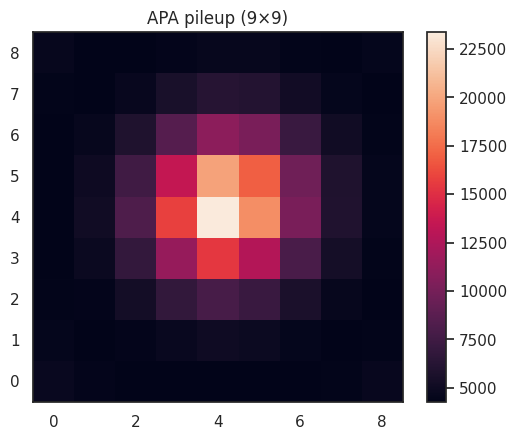

In [81]:
import os
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

spots_dir = './test/csv/'
img_dir = './test/Deconvoled/'
W = 9
h = W // 2

pileup = np.zeros((W, W), dtype=float)
n = 0

for csv_path in glob.glob(os.path.join(spots_dir, '*.csv')):
    name = os.path.splitext(os.path.basename(csv_path))[0]
    df = pd.read_csv(csv_path)
    img_path = os.path.join(img_dir, (name + '.tif'))
    img = imread(img_path)
    img_pad = np.pad(img, h, mode='constant')

    for y, x in zip(df['axis-0'], df['axis-1']):
        y, x = int(y), int(x)
        patch = img_pad[y:y+W, x:x+W]
        if patch.shape == (W, W):
            pileup += patch
            n += 1

pileup /= n

plt.imshow(pileup, origin='lower')
plt.colorbar()
plt.title('APA pileup (9×9)') 
plt.savefig('deconv_img_APA.pdf')
plt.show()


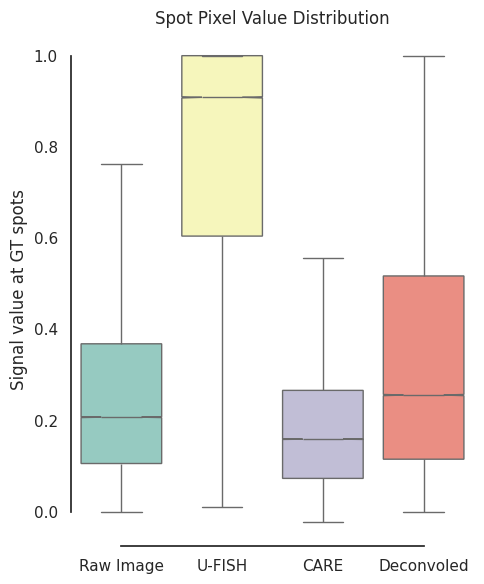

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns

spots_dir = './test/csv/'
img_dirs = [
    ('Raw Image', './test/image_scaled/'),
    ('U-FISH', './test/ufish_enhance/'),
    ('CARE', './test/pre_img/'),
    ('Deconvoled', './test/Deconvoled/')
]

spot_values = {name: [] for name, _ in img_dirs}
for csv_path in glob.glob(os.path.join(spots_dir, '*.csv')):
    name = os.path.splitext(os.path.basename(csv_path))[0]
    df = pd.read_csv(csv_path)
    for label, img_dir in img_dirs:
        img_file = f'{name}.enhanced.tif' if 'ufish_enhance' in img_dir else f'{name}.tif'
        img_path = os.path.join(img_dir, img_file)
        if not os.path.exists(img_path):
            continue
        img = imread(img_path)
        for y, x in zip(df['axis-0'], df['axis-1']):
            val = img[int(y), int(x)]
            if label in ('U-FISH', 'CARE') and val > 1:
                val = 1
            spot_values[label].append(val)

df_values = pd.DataFrame(spot_values)

sns.set_theme(style="white",font_scale=1)
plt.figure(figsize=(5, 6))
ax = sns.boxplot(
    data=df_values,
    showfliers=False,
    palette="Set3",
    notch=True
)
ax.set_xlabel("")
ax.set_ylabel("Signal value at GT spots")
ax.set_title("Spot Pixel Value Distribution")
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('spots_value.pdf')
plt.show()


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_353.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1148.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/seqFISH_61.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_58.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1155.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1

./test/Deconvoled/ExSeq_353.tif has saved
./test/Deconvoled/MERFISH_432.tif has saved
./test/Deconvoled/RCA_1148.tif has saved
./test/Deconvoled/deepblink_594.tif has saved
./test/Deconvoled/deepblink_239.tif has saved
./test/Deconvoled/seqFISH_61.tif has saved
./test/Deconvoled/RCA_58.tif has saved
./test/Deconvoled/simfish_304.tif has saved
./test/Deconvoled/simfish_432.tif has saved
./test/Deconvoled/MERFISH_238.tif has saved
./test/Deconvoled/RCA_1155.tif has saved
./test/Deconvoled/seqFISH_503.tif has saved
./test/Deconvoled/RCA_157.tif has saved
./test/Deconvoled/deepspot_36.tif has saved
./test/Deconvoled/seqFISH_152.tif has saved
./test/Deconvoled/MERFISH_449.tif has saved
./test/Deconvoled/deepspot_95.tif has saved
./test/Deconvoled/deepspot_380.tif has saved
./test/Deconvoled/RCA_309.tif has saved
./test/Deconvoled/RCA_227.tif has saved
./test/Deconvoled/deepspot_306.tif has saved
./test/Deconvoled/simfish_340.tif has saved
./test/Deconvoled/simfish_495.tif has saved
./test/D

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/simfish_123.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_906.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_907.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_405.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_364.tif is a low contrast image
  return func(*args, **kwargs)


./test/Deconvoled/MERFISH_206.tif has saved
./test/Deconvoled/simfish_289.tif has saved
./test/Deconvoled/seqFISH_398.tif has saved
./test/Deconvoled/RCA_469.tif has saved
./test/Deconvoled/MERFISH_208.tif has saved
./test/Deconvoled/deepspot_189.tif has saved
./test/Deconvoled/ExSeq_197.tif has saved
./test/Deconvoled/RCA_1103.tif has saved
./test/Deconvoled/MERFISH_539.tif has saved
./test/Deconvoled/RCA_538.tif has saved
./test/Deconvoled/ExSeq_85.tif has saved
./test/Deconvoled/RCA_496.tif has saved
./test/Deconvoled/ExSeq_187.tif has saved
./test/Deconvoled/deepblink_585.tif has saved
./test/Deconvoled/MERFISH_5.tif has saved
./test/Deconvoled/RCA_483.tif has saved
./test/Deconvoled/seqFISH_397.tif has saved
./test/Deconvoled/MERFISH_460.tif has saved
./test/Deconvoled/seqFISH_216.tif has saved
./test/Deconvoled/seqFISH_341.tif has saved
./test/Deconvoled/seqFISH_141.tif has saved
./test/Deconvoled/RCA_665.tif has saved
./test/Deconvoled/ExSeq_267.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_469.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_197.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1103.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_85.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_496.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_1

./test/Deconvoled/seqFISH_444.tif has saved
./test/Deconvoled/seqFISH_240.tif has saved
./test/Deconvoled/RCA_72.tif has saved
./test/Deconvoled/RCA_341.tif has saved
./test/Deconvoled/deepspot_468.tif has saved
./test/Deconvoled/simfish_283.tif has saved
./test/Deconvoled/simfish_59.tif has saved
./test/Deconvoled/RCA_1233.tif has saved
./test/Deconvoled/ExSeq_377.tif has saved
./test/Deconvoled/deepspot_181.tif has saved
./test/Deconvoled/deepblink_87.tif has saved
./test/Deconvoled/seqFISH_281.tif has saved
./test/Deconvoled/deepblink_81.tif has saved
./test/Deconvoled/RCA_1149.tif has saved
./test/Deconvoled/MERFISH_276.tif has saved
./test/Deconvoled/MERFISH_302.tif has saved
./test/Deconvoled/deepspot_38.tif has saved
./test/Deconvoled/ExSeq_63.tif has saved
./test/Deconvoled/ExSeq_386.tif has saved
./test/Deconvoled/MERFISH_410.tif has saved
./test/Deconvoled/deepblink_574.tif has saved
./test/Deconvoled/seqFISH_167.tif has saved
./test/Deconvoled/deepblink_418.tif has saved
./t

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1233.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_377.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/deepblink_81.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1149.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_386.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/

./test/Deconvoled/simfish_147.tif has saved
./test/Deconvoled/MERFISH_372.tif has saved
./test/Deconvoled/deepblink_329.tif has saved
./test/Deconvoled/seqFISH_252.tif has saved
./test/Deconvoled/deepblink_145.tif has saved
./test/Deconvoled/deepblink_245.tif has saved
./test/Deconvoled/RCA_1104.tif has saved
./test/Deconvoled/RCA_861.tif has saved
./test/Deconvoled/simfish_204.tif has saved
./test/Deconvoled/RCA_210.tif has saved
./test/Deconvoled/seqFISH_254.tif has saved
./test/Deconvoled/seqFISH_207.tif has saved
./test/Deconvoled/ExSeq_372.tif has saved
./test/Deconvoled/RCA_607.tif has saved
./test/Deconvoled/simfish_317.tif has saved
./test/Deconvoled/MERFISH_283.tif has saved
./test/Deconvoled/ExSeq_309.tif has saved
./test/Deconvoled/ExSeq_86.tif has saved
./test/Deconvoled/ExSeq_370.tif has saved
./test/Deconvoled/seqFISH_78.tif has saved
./test/Deconvoled/RCA_543.tif has saved
./test/Deconvoled/deepspot_54.tif has saved
./test/Deconvoled/RCA_5.tif has saved
./test/Deconvoled

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_210.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_372.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_607.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_309.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_86.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_

./test/Deconvoled/simfish_449.tif has saved
./test/Deconvoled/RCA_1197.tif has saved
./test/Deconvoled/deepblink_575.tif has saved
./test/Deconvoled/simfish_27.tif has saved
./test/Deconvoled/MERFISH_325.tif has saved
./test/Deconvoled/MERFISH_517.tif has saved
./test/Deconvoled/RCA_877.tif has saved
./test/Deconvoled/RCA_1135.tif has saved
./test/Deconvoled/RCA_1173.tif has saved
./test/Deconvoled/simfish_385.tif has saved
./test/Deconvoled/ExSeq_401.tif has saved
./test/Deconvoled/RCA_999.tif has saved
./test/Deconvoled/seqFISH_176.tif has saved
./test/Deconvoled/deepspot_402.tif has saved
./test/Deconvoled/deepblink_191.tif has saved
./test/Deconvoled/RCA_585.tif has saved
./test/Deconvoled/RCA_203.tif has saved
./test/Deconvoled/deepblink_43.tif has saved
./test/Deconvoled/deepspot_430.tif has saved
./test/Deconvoled/MERFISH_47.tif has saved
./test/Deconvoled/deepspot_390.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_877.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1135.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1173.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_401.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_999.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_4

./test/Deconvoled/ExSeq_452.tif has saved
./test/Deconvoled/simfish_250.tif has saved
./test/Deconvoled/deepblink_446.tif has saved
./test/Deconvoled/deepspot_319.tif has saved
./test/Deconvoled/deepblink_619.tif has saved
./test/Deconvoled/MERFISH_240.tif has saved
./test/Deconvoled/deepblink_464.tif has saved
./test/Deconvoled/RCA_990.tif has saved
./test/Deconvoled/seqFISH_431.tif has saved
./test/Deconvoled/deepblink_101.tif has saved
./test/Deconvoled/deepblink_479.tif has saved
./test/Deconvoled/RCA_746.tif has saved
./test/Deconvoled/RCA_1029.tif has saved
./test/Deconvoled/RCA_1099.tif has saved
./test/Deconvoled/RCA_1138.tif has saved
./test/Deconvoled/MERFISH_44.tif has saved
./test/Deconvoled/seqFISH_30.tif has saved
./test/Deconvoled/MERFISH_474.tif has saved
./test/Deconvoled/MERFISH_250.tif has saved
./test/Deconvoled/simfish_270.tif has saved
./test/Deconvoled/deepspot_364.tif has saved
./test/Deconvoled/RCA_323.tif has saved
./test/Deconvoled/ExSeq_441.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_746.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1099.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1138.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_323.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_441.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_641

./test/Deconvoled/MERFISH_398.tif has saved
./test/Deconvoled/deepblink_413.tif has saved
./test/Deconvoled/RCA_641.tif has saved
./test/Deconvoled/RCA_402.tif has saved
./test/Deconvoled/simfish_203.tif has saved
./test/Deconvoled/deepspot_481.tif has saved
./test/Deconvoled/deepblink_402.tif has saved
./test/Deconvoled/RCA_15.tif has saved
./test/Deconvoled/RCA_839.tif has saved
./test/Deconvoled/deepblink_21.tif has saved
./test/Deconvoled/deepblink_487.tif has saved
./test/Deconvoled/ExSeq_53.tif has saved
./test/Deconvoled/RCA_1176.tif has saved
./test/Deconvoled/seqFISH_36.tif has saved
./test/Deconvoled/ExSeq_31.tif has saved
./test/Deconvoled/RCA_1069.tif has saved
./test/Deconvoled/MERFISH_244.tif has saved
./test/Deconvoled/MERFISH_483.tif has saved
./test/Deconvoled/RCA_523.tif has saved
./test/Deconvoled/MERFISH_440.tif has saved
./test/Deconvoled/RCA_470.tif has saved
./test/Deconvoled/simfish_198.tif has saved
./test/Deconvoled/ExSeq_260.tif has saved
./test/Deconvoled/RC

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1176.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/seqFISH_36.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_31.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1069.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_523.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq

./test/Deconvoled/MERFISH_450.tif has saved
./test/Deconvoled/MERFISH_447.tif has saved
./test/Deconvoled/MERFISH_40.tif has saved
./test/Deconvoled/deepblink_136.tif has saved
./test/Deconvoled/deepblink_597.tif has saved
./test/Deconvoled/RCA_68.tif has saved
./test/Deconvoled/RCA_670.tif has saved
./test/Deconvoled/ExSeq_47.tif has saved
./test/Deconvoled/deepblink_478.tif has saved
./test/Deconvoled/RCA_556.tif has saved
./test/Deconvoled/ExSeq_366.tif has saved
./test/Deconvoled/seqFISH_386.tif has saved
./test/Deconvoled/deepblink_641.tif has saved
./test/Deconvoled/ExSeq_333.tif has saved
./test/Deconvoled/ExSeq_153.tif has saved
./test/Deconvoled/ExSeq_255.tif has saved
./test/Deconvoled/MERFISH_155.tif has saved
./test/Deconvoled/RCA_976.tif has saved
./test/Deconvoled/deepspot_359.tif has saved
./test/Deconvoled/RCA_16.tif has saved
./test/Deconvoled/RCA_1046.tif has saved
./test/Deconvoled/RCA_1206.tif has saved
./test/Deconvoled/deepspot_252.tif has saved
./test/Deconvoled/

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_366.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_333.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_153.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_255.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_976.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA

./test/Deconvoled/deepblink_207.tif has saved
./test/Deconvoled/ExSeq_176.tif has saved
./test/Deconvoled/MERFISH_291.tif has saved
./test/Deconvoled/deepblink_424.tif has saved
./test/Deconvoled/RCA_530.tif has saved
./test/Deconvoled/RCA_992.tif has saved
./test/Deconvoled/deepblink_626.tif has saved
./test/Deconvoled/simfish_135.tif has saved
./test/Deconvoled/MERFISH_354.tif has saved
./test/Deconvoled/MERFISH_198.tif has saved
./test/Deconvoled/RCA_218.tif has saved
./test/Deconvoled/RCA_270.tif has saved
./test/Deconvoled/RCA_988.tif has saved
./test/Deconvoled/RCA_237.tif has saved
./test/Deconvoled/deepspot_305.tif has saved
./test/Deconvoled/seqFISH_294.tif has saved
./test/Deconvoled/RCA_83.tif has saved
./test/Deconvoled/deepblink_180.tif has saved
./test/Deconvoled/RCA_176.tif has saved
./test/Deconvoled/simfish_143.tif has saved
./test/Deconvoled/ExSeq_19.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_988.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_83.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_176.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/simfish_143.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_481.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_518.

./test/Deconvoled/RCA_481.tif has saved
./test/Deconvoled/deepblink_65.tif has saved
./test/Deconvoled/deepspot_71.tif has saved
./test/Deconvoled/simfish_74.tif has saved
./test/Deconvoled/simfish_364.tif has saved
./test/Deconvoled/simfish_193.tif has saved
./test/Deconvoled/RCA_518.tif has saved
./test/Deconvoled/ExSeq_408.tif has saved
./test/Deconvoled/RCA_537.tif has saved
./test/Deconvoled/ExSeq_434.tif has saved
./test/Deconvoled/RCA_204.tif has saved
./test/Deconvoled/RCA_1032.tif has saved
./test/Deconvoled/simfish_332.tif has saved
./test/Deconvoled/simfish_52.tif has saved
./test/Deconvoled/seqFISH_55.tif has saved
./test/Deconvoled/deepblink_609.tif has saved
./test/Deconvoled/deepblink_406.tif has saved
./test/Deconvoled/deepspot_259.tif has saved
./test/Deconvoled/deepblink_627.tif has saved
./test/Deconvoled/seqFISH_508.tif has saved
./test/Deconvoled/ExSeq_286.tif has saved
./test/Deconvoled/deepblink_102.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_286.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_794.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_835.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_173.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_32.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_71

./test/Deconvoled/RCA_794.tif has saved
./test/Deconvoled/RCA_361.tif has saved
./test/Deconvoled/RCA_453.tif has saved
./test/Deconvoled/deepspot_493.tif has saved
./test/Deconvoled/RCA_463.tif has saved
./test/Deconvoled/simfish_281.tif has saved
./test/Deconvoled/RCA_835.tif has saved
./test/Deconvoled/simfish_169.tif has saved
./test/Deconvoled/deepblink_367.tif has saved
./test/Deconvoled/deepspot_347.tif has saved
./test/Deconvoled/deepblink_603.tif has saved
./test/Deconvoled/MERFISH_572.tif has saved
./test/Deconvoled/ExSeq_173.tif has saved
./test/Deconvoled/ExSeq_32.tif has saved
./test/Deconvoled/RCA_713.tif has saved
./test/Deconvoled/simfish_430.tif has saved
./test/Deconvoled/RCA_888.tif has saved
./test/Deconvoled/deepblink_198.tif has saved
./test/Deconvoled/deepblink_622.tif has saved
./test/Deconvoled/RCA_347.tif has saved
./test/Deconvoled/deepblink_236.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_926.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_845.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_872.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_186.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_745.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_474.tif

./test/Deconvoled/RCA_926.tif has saved
./test/Deconvoled/deepblink_403.tif has saved
./test/Deconvoled/deepblink_67.tif has saved
./test/Deconvoled/simfish_479.tif has saved
./test/Deconvoled/RCA_845.tif has saved
./test/Deconvoled/RCA_872.tif has saved
./test/Deconvoled/deepblink_35.tif has saved
./test/Deconvoled/deepblink_189.tif has saved
./test/Deconvoled/deepblink_481.tif has saved
./test/Deconvoled/RCA_1212.tif has saved
./test/Deconvoled/deepblink_346.tif has saved
./test/Deconvoled/RCA_186.tif has saved
./test/Deconvoled/deepblink_184.tif has saved
./test/Deconvoled/MERFISH_571.tif has saved
./test/Deconvoled/RCA_745.tif has saved
./test/Deconvoled/deepblink_103.tif has saved
./test/Deconvoled/deepspot_350.tif has saved
./test/Deconvoled/deepblink_223.tif has saved
./test/Deconvoled/deepblink_167.tif has saved
./test/Deconvoled/MERFISH_489.tif has saved
./test/Deconvoled/RCA_566.tif has saved
./test/Deconvoled/RCA_474.tif has saved
./test/Deconvoled/deepblink_486.tif has save

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_95.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1247.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_154.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_5.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_182.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_315

./test/Deconvoled/MERFISH_335.tif has saved
./test/Deconvoled/deepspot_331.tif has saved
./test/Deconvoled/RCA_871.tif has saved
./test/Deconvoled/simfish_419.tif has saved
./test/Deconvoled/ExSeq_104.tif has saved
./test/Deconvoled/RCA_833.tif has saved
./test/Deconvoled/deepblink_257.tif has saved
./test/Deconvoled/deepspot_367.tif has saved
./test/Deconvoled/simfish_118.tif has saved
./test/Deconvoled/seqFISH_107.tif has saved
./test/Deconvoled/deepspot_61.tif has saved
./test/Deconvoled/MERFISH_79.tif has saved
./test/Deconvoled/deepblink_272.tif has saved
./test/Deconvoled/RCA_1090.tif has saved
./test/Deconvoled/MERFISH_466.tif has saved
./test/Deconvoled/simfish_329.tif has saved
./test/Deconvoled/seqFISH_310.tif has saved
./test/Deconvoled/MERFISH_329.tif has saved
./test/Deconvoled/simfish_226.tif has saved
./test/Deconvoled/ExSeq_474.tif has saved
./test/Deconvoled/deepblink_20.tif has saved
./test/Deconvoled/simfish_7.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_104.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_833.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/simfish_118.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1090.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_474.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RC

./test/Deconvoled/simfish_236.tif has saved
./test/Deconvoled/deepspot_276.tif has saved
./test/Deconvoled/MERFISH_156.tif has saved
./test/Deconvoled/RCA_295.tif has saved
./test/Deconvoled/deepblink_260.tif has saved
./test/Deconvoled/deepblink_168.tif has saved
./test/Deconvoled/MERFISH_575.tif has saved
./test/Deconvoled/seqFISH_238.tif has saved
./test/Deconvoled/ExSeq_72.tif has saved
./test/Deconvoled/deepspot_105.tif has saved
./test/Deconvoled/MERFISH_215.tif has saved
./test/Deconvoled/deepspot_58.tif has saved
./test/Deconvoled/ExSeq_99.tif has saved
./test/Deconvoled/deepspot_360.tif has saved
./test/Deconvoled/seqFISH_211.tif has saved
./test/Deconvoled/simfish_246.tif has saved
./test/Deconvoled/deepspot_494.tif has saved
./test/Deconvoled/RCA_865.tif has saved
./test/Deconvoled/simfish_161.tif has saved
./test/Deconvoled/deepblink_544.tif has saved
./test/Deconvoled/deepblink_292.tif has saved
./test/Deconvoled/RCA_544.tif has saved
./test/Deconvoled/deepblink_173.tif ha

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_99.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/simfish_246.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_865.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_405.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_569.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_

./test/Deconvoled/MERFISH_106.tif has saved
./test/Deconvoled/seqFISH_156.tif has saved
./test/Deconvoled/simfish_378.tif has saved
./test/Deconvoled/MERFISH_190.tif has saved
./test/Deconvoled/deepspot_173.tif has saved
./test/Deconvoled/ExSeq_405.tif has saved
./test/Deconvoled/deepblink_513.tif has saved
./test/Deconvoled/RCA_569.tif has saved
./test/Deconvoled/RCA_764.tif has saved
./test/Deconvoled/deepblink_485.tif has saved
./test/Deconvoled/RCA_1010.tif has saved
./test/Deconvoled/deepspot_433.tif has saved
./test/Deconvoled/RCA_1224.tif has saved
./test/Deconvoled/deepblink_209.tif has saved
./test/Deconvoled/RCA_952.tif has saved
./test/Deconvoled/simfish_235.tif has saved
./test/Deconvoled/simfish_381.tif has saved
./test/Deconvoled/deepblink_621.tif has saved
./test/Deconvoled/RCA_659.tif has saved
./test/Deconvoled/RCA_559.tif has saved
./test/Deconvoled/seqFISH_89.tif has saved
./test/Deconvoled/ExSeq_367.tif has saved
./test/Deconvoled/simfish_35.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_952.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_659.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_367.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_593.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_406.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_3

./test/Deconvoled/MERFISH_534.tif has saved
./test/Deconvoled/MERFISH_94.tif has saved
./test/Deconvoled/RCA_593.tif has saved
./test/Deconvoled/ExSeq_406.tif has saved
./test/Deconvoled/deepblink_394.tif has saved
./test/Deconvoled/ExSeq_331.tif has saved
./test/Deconvoled/deepblink_442.tif has saved
./test/Deconvoled/deepblink_366.tif has saved
./test/Deconvoled/simfish_149.tif has saved
./test/Deconvoled/seqFISH_380.tif has saved
./test/Deconvoled/RCA_930.tif has saved
./test/Deconvoled/deepspot_9.tif has saved
./test/Deconvoled/deepblink_526.tif has saved
./test/Deconvoled/simfish_56.tif has saved
./test/Deconvoled/RCA_821.tif has saved
./test/Deconvoled/ExSeq_205.tif has saved
./test/Deconvoled/RCA_189.tif has saved
./test/Deconvoled/ExSeq_81.tif has saved
./test/Deconvoled/simfish_153.tif has saved
./test/Deconvoled/RCA_677.tif has saved
./test/Deconvoled/seqFISH_9.tif has saved
./test/Deconvoled/RCA_655.tif has saved
./test/Deconvoled/RCA_586.tif has saved
./test/Deconvoled/deep

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_205.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_189.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_81.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_677.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_655.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_855.

./test/Deconvoled/simfish_471.tif has saved
./test/Deconvoled/seqFISH_20.tif has saved
./test/Deconvoled/RCA_855.tif has saved
./test/Deconvoled/ExSeq_376.tif has saved
./test/Deconvoled/MERFISH_487.tif has saved
./test/Deconvoled/seqFISH_249.tif has saved
./test/Deconvoled/simfish_371.tif has saved
./test/Deconvoled/simfish_205.tif has saved
./test/Deconvoled/deepspot_74.tif has saved
./test/Deconvoled/deepblink_262.tif has saved
./test/Deconvoled/MERFISH_280.tif has saved
./test/Deconvoled/ExSeq_467.tif has saved
./test/Deconvoled/simfish_67.tif has saved
./test/Deconvoled/seqFISH_85.tif has saved
./test/Deconvoled/RCA_125.tif has saved
./test/Deconvoled/MERFISH_96.tif has saved
./test/Deconvoled/deepblink_495.tif has saved
./test/Deconvoled/simfish_128.tif has saved
./test/Deconvoled/ExSeq_221.tif has saved
./test/Deconvoled/RCA_950.tif has saved
./test/Deconvoled/deepblink_533.tif has saved
./test/Deconvoled/MERFISH_75.tif has saved
./test/Deconvoled/ExSeq_298.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_125.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/simfish_128.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_221.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_950.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_298.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA

./test/Deconvoled/RCA_577.tif has saved
./test/Deconvoled/RCA_1073.tif has saved
./test/Deconvoled/deepspot_83.tif has saved
./test/Deconvoled/seqFISH_405.tif has saved
./test/Deconvoled/RCA_205.tif has saved
./test/Deconvoled/deepblink_62.tif has saved
./test/Deconvoled/MERFISH_441.tif has saved
./test/Deconvoled/RCA_777.tif has saved
./test/Deconvoled/MERFISH_406.tif has saved
./test/Deconvoled/simfish_442.tif has saved
./test/Deconvoled/MERFISH_413.tif has saved
./test/Deconvoled/RCA_629.tif has saved
./test/Deconvoled/deepspot_248.tif has saved
./test/Deconvoled/seqFISH_212.tif has saved
./test/Deconvoled/ExSeq_278.tif has saved
./test/Deconvoled/RCA_521.tif has saved
./test/Deconvoled/RCA_511.tif has saved
./test/Deconvoled/MERFISH_227.tif has saved
./test/Deconvoled/deepspot_21.tif has saved
./test/Deconvoled/deepspot_386.tif has saved
./test/Deconvoled/RCA_1062.tif has saved
./test/Deconvoled/deepspot_291.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_278.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_521.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_511.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1062.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1007.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_191

./test/Deconvoled/deepblink_331.tif has saved
./test/Deconvoled/seqFISH_416.tif has saved
./test/Deconvoled/seqFISH_282.tif has saved
./test/Deconvoled/seqFISH_88.tif has saved
./test/Deconvoled/RCA_1007.tif has saved
./test/Deconvoled/deepblink_13.tif has saved
./test/Deconvoled/deepspot_393.tif has saved
./test/Deconvoled/seqFISH_362.tif has saved
./test/Deconvoled/RCA_191.tif has saved
./test/Deconvoled/simfish_90.tif has saved
./test/Deconvoled/RCA_1097.tif has saved
./test/Deconvoled/ExSeq_352.tif has saved
./test/Deconvoled/ExSeq_410.tif has saved
./test/Deconvoled/simfish_416.tif has saved
./test/Deconvoled/MERFISH_162.tif has saved
./test/Deconvoled/simfish_216.tif has saved
./test/Deconvoled/deepspot_470.tif has saved
./test/Deconvoled/ExSeq_88.tif has saved
./test/Deconvoled/RCA_44.tif has saved
./test/Deconvoled/deepspot_46.tif has saved
./test/Deconvoled/RCA_25.tif has saved
./test/Deconvoled/seqFISH_462.tif has saved
./test/Deconvoled/ExSeq_253.tif has saved
./test/Deconvo

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_88.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_44.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_25.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_253.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_943.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_840.ti

./test/Deconvoled/RCA_840.tif has saved
./test/Deconvoled/deepblink_404.tif has saved
./test/Deconvoled/RCA_619.tif has saved
./test/Deconvoled/MERFISH_546.tif has saved
./test/Deconvoled/RCA_1013.tif has saved
./test/Deconvoled/RCA_213.tif has saved
./test/Deconvoled/deepspot_280.tif has saved
./test/Deconvoled/ExSeq_46.tif has saved
./test/Deconvoled/deepspot_479.tif has saved
./test/Deconvoled/RCA_321.tif has saved
./test/Deconvoled/RCA_717.tif has saved
./test/Deconvoled/RCA_982.tif has saved
./test/Deconvoled/deepspot_132.tif has saved
./test/Deconvoled/RCA_151.tif has saved
./test/Deconvoled/RCA_116.tif has saved
./test/Deconvoled/deepspot_333.tif has saved
./test/Deconvoled/deepspot_25.tif has saved
./test/Deconvoled/RCA_1166.tif has saved
./test/Deconvoled/deepspot_3.tif has saved
./test/Deconvoled/seqFISH_520.tif has saved
./test/Deconvoled/MERFISH_146.tif has saved
./test/Deconvoled/seqFISH_330.tif has saved


/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1166.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_1047.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_17.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_10.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_228.tif is a low contrast image
  return func(*args, **kwargs)


./test/Deconvoled/seqFISH_494.tif has saved
./test/Deconvoled/RCA_1047.tif has saved
./test/Deconvoled/deepspot_403.tif has saved
./test/Deconvoled/ExSeq_17.tif has saved
./test/Deconvoled/deepblink_365.tif has saved
./test/Deconvoled/MERFISH_480.tif has saved
./test/Deconvoled/ExSeq_55.tif has saved
./test/Deconvoled/deepblink_338.tif has saved
./test/Deconvoled/seqFISH_99.tif has saved
./test/Deconvoled/seqFISH_286.tif has saved
./test/Deconvoled/deepspot_230.tif has saved
./test/Deconvoled/deepblink_327.tif has saved
./test/Deconvoled/RCA_10.tif has saved
./test/Deconvoled/MERFISH_279.tif has saved
./test/Deconvoled/seqFISH_430.tif has saved
./test/Deconvoled/simfish_185.tif has saved
./test/Deconvoled/ExSeq_228.tif has saved
./test/Deconvoled/simfish_251.tif has saved
./test/Deconvoled/ExSeq_130.tif has saved
./test/Deconvoled/MERFISH_376.tif has saved
./test/Deconvoled/deepspot_170.tif has saved
./test/Deconvoled/seqFISH_192.tif has saved
./test/Deconvoled/deepblink_42.tif has sav

/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_130.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_388.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_225.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/MERFISH_117.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/ExSeq_25.tif is a low contrast image
  return func(*args, **kwargs)
/home/hycai/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:328: UserWarning: ./test/Deconvoled/RCA_

./test/Deconvoled/simfish_211.tif has saved
./test/Deconvoled/RCA_388.tif has saved
./test/Deconvoled/RCA_225.tif has saved
./test/Deconvoled/simfish_11.tif has saved
./test/Deconvoled/MERFISH_117.tif has saved
./test/Deconvoled/deepblink_34.tif has saved
./test/Deconvoled/seqFISH_328.tif has saved
./test/Deconvoled/seqFISH_303.tif has saved
./test/Deconvoled/simfish_492.tif has saved
./test/Deconvoled/ExSeq_25.tif has saved
./test/Deconvoled/RCA_520.tif has saved
./test/Deconvoled/RCA_344.tif has saved
./test/Deconvoled/MERFISH_386.tif has saved
./test/Deconvoled/MERFISH_317.tif has saved
./test/Deconvoled/RCA_1234.tif has saved
./test/Deconvoled/deepblink_24.tif has saved
./test/Deconvoled/MERFISH_263.tif has saved
./test/Deconvoled/MERFISH_463.tif has saved
./test/Deconvoled/seqFISH_350.tif has saved
./test/Deconvoled/simfish_366.tif has saved
./test/Deconvoled/seqFISH_50.tif has saved
./test/Deconvoled/MERFISH_197.tif has saved
./test/Deconvoled/RCA_468.tif has saved


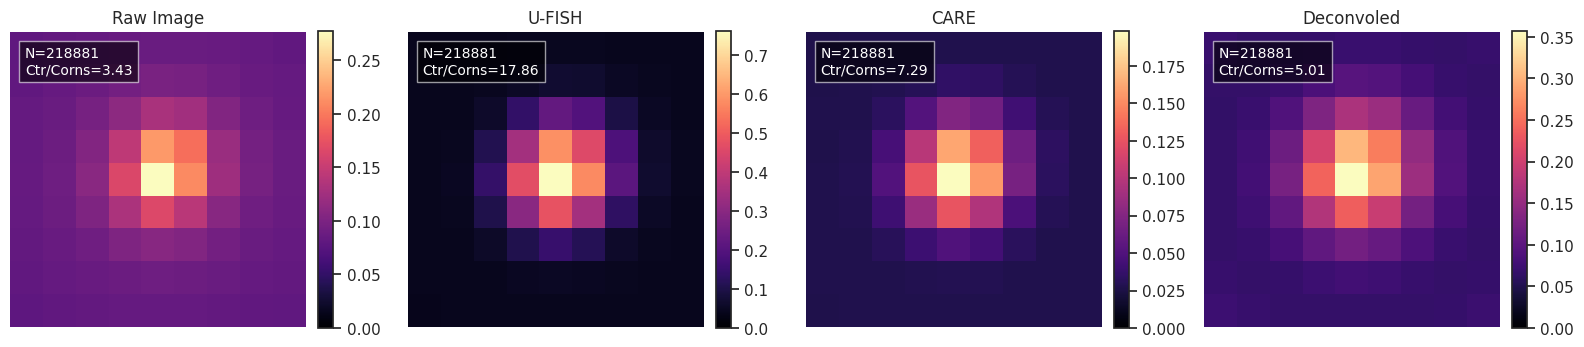

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
from skimage.io import imread,imsave
import matplotlib.pyplot as plt

spots_dir = './test/csv/'
img_dirs = [
    ('Raw Image', './test/image_scaled/'),
    ('U-FISH', './test/ufish_enhance/'),
    ('CARE', './test/pre_img/'),
    ('Deconvoled', './test/Deconvoled/')
]

W = 9
h = W // 2

# Prepare figure
fig, axes = plt.subplots(1, len(img_dirs), figsize=(4 * len(img_dirs), 4))

for ax, (label, img_dir) in zip(axes, img_dirs):
    sum_patch = np.zeros((W, W), dtype=float)
    sum_sq_patch = np.zeros((W, W), dtype=float)
    n = 0

    for csv_path in glob.glob(os.path.join(spots_dir, '*.csv')):
        name = os.path.splitext(os.path.basename(csv_path))[0].split('.')[0]
        df = pd.read_csv(csv_path)

        if 'ufish_enhance' in img_dir:
            img_path = os.path.join(img_dir, f'{name}.enhanced.tif')
        else:
            img_path = os.path.join(img_dir, f'{name}.tif')

        img = imread(img_path)
        if 'Deconvoled' in img_dir:
            img = img.astype('float32')
            img = (img - img.min()) / (img.max() - img.min() + 1e-8)
            imsave(img_path, img)
            print(f'{img_path} has saved')
        if 'ufish_enhance' in img_dir:
            img = np.clip(img, None, 1)
        img_pad = np.pad(img, h, mode='constant')

        for y, x in zip(df['axis-0'], df['axis-1']):
            y, x = int(y), int(x)
            patch = img_pad[y:y+W, x:x+W]
            if patch.shape == (W, W):
                sum_patch += patch
                sum_sq_patch += patch**2
                n += 1

    mean_patch = sum_patch / n

    im = ax.imshow(mean_patch, origin='lower', cmap='magma', vmin=0)
    ax.set_title(label)
    ax.axis('off')

    center_val = mean_patch[h, h]
    corners = np.array([
        mean_patch[0, 0], mean_patch[0, -1],
        mean_patch[-1, 0], mean_patch[-1, -1]
    ])
    ratio = center_val / corners.mean() if corners.mean() != 0 else np.nan
    ax.text(
        0.05, 0.95,
        f"N={n}\nCtr/Corns={ratio:.2f}",
        transform=ax.transAxes, va='top', ha='left',
        color='white', fontsize=10,
        bbox=dict(facecolor='black', alpha=0.6)
    )

    fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.savefig('Compared_APA.pdf')
plt.show()
